# Random Forest.
## Assignment

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [10]:
check = pd.read_csv("Fraud_check.csv")
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [11]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [12]:
check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [13]:
check[check.duplicated()] #No Duplicated Rows

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [14]:
#Given Condition --> Taxable_income <= 30000 as "Risky" and others are "Good"
#Converting Target variable 'Taxable.Income' into categories Risky,good.
check['Taxable.Income'] = pd.cut( x = check['Taxable.Income'], bins = [10000,30000,100000], labels = ['Risky','good'])

In [15]:
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


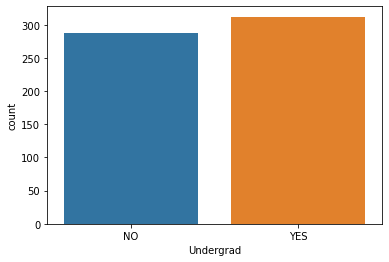

YES    312
NO     288
Name: Undergrad, dtype: int64

In [16]:
sns.countplot(check["Undergrad"])
plt.show()
check["Undergrad"].value_counts()

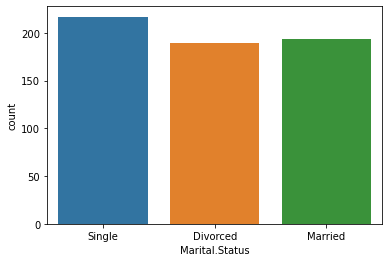

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [17]:
sns.countplot(check["Marital.Status"])
plt.show()
check["Marital.Status"].value_counts()

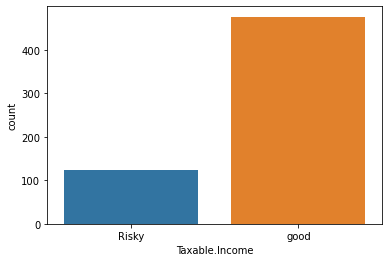

good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [18]:
sns.countplot(check["Taxable.Income"])
plt.show()
check["Taxable.Income"].value_counts()

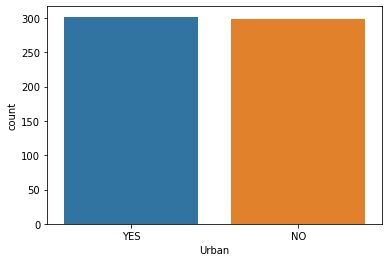

YES    302
NO     298
Name: Urban, dtype: int64

In [19]:
sns.countplot(check["Urban"])
plt.show()
check["Urban"].value_counts()

In [20]:
#Assigning Positive Numbers for all Categorical Variables/col.
from sklearn.preprocessing import LabelEncoder
check["Undergrad"] = LabelEncoder().fit_transform(check["Undergrad"])
check["Marital.Status"] = LabelEncoder().fit_transform(check["Marital.Status"])
check["Taxable.Income"] = LabelEncoder().fit_transform(check["Taxable.Income"])
check["Urban"] = LabelEncoder().fit_transform(check["Urban"])
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


## Lets assume: Taxable_Income <= 30000 as Risky = 0.
## And others as Good = 1.

In [21]:
check.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.793333,108747.368333,15.558333,0.503333
std,0.500017,0.821958,0.405252,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,1.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,199778.000000,30.000000,1.000000


### PPSCORE

In [28]:
import ppscore as pps
pps.matrix(check)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Undergrad,Undergrad,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Undergrad,Marital.Status,0.000000,regression,True,mean absolute error,0.676667,0.689966,DecisionTreeRegressor()
2,Undergrad,Taxable.Income,0.000000,regression,True,mean absolute error,0.206667,0.328352,DecisionTreeRegressor()
3,Undergrad,City.Population,0.006556,regression,True,mean absolute error,42730.781667,42450.626013,DecisionTreeRegressor()
4,Undergrad,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,7.710043,DecisionTreeRegressor()
5,Undergrad,Urban,0.000000,regression,True,mean absolute error,0.496667,0.501345,DecisionTreeRegressor()
6,Marital.Status,Undergrad,0.000000,regression,True,mean absolute error,0.480000,0.499927,DecisionTreeRegressor()
7,Marital.Status,Marital.Status,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,Marital.Status,Taxable.Income,0.000000,regression,True,mean absolute error,0.206667,0.329530,DecisionTreeRegressor()
9,Marital.Status,City.Population,0.000000,regression,True,mean absolute error,42730.781667,42890.394252,DecisionTreeRegressor()


## Normalization function 

In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
# Normalized data frame
check_norm = norm_func(check)
check_norm.tail(7)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
593,0.0,0.0,1.0,0.610256,0.333333,1.0
594,0.0,0.5,1.0,0.412341,0.300000,1.0
595,1.0,0.0,1.0,0.078811,0.233333,1.0
596,1.0,0.0,1.0,0.170058,0.066667,1.0
597,0.0,0.0,1.0,0.737240,0.000000,1.0
598,1.0,0.5,1.0,0.886810,0.566667,0.0
599,0.0,0.0,1.0,0.760683,0.533333,0.0


### FEATURE ENGINEERING:-
#### METHOD:- Feature Extraction with Recursive Feature Elimination.(RFE)

In [111]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = check_norm.drop(["Taxable.Income"],axis = 1)
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0


In [112]:
Y = check_norm["Taxable.Income"]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: Taxable.Income, Length: 600, dtype: float64

In [113]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,3).fit(X, Y)

In [114]:
# Feature Ranking:
fit.ranking_

array([1, 1, 1, 3, 2])

In [115]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0


### Selecting Only Top 3 Features.

In [116]:
X_feat = X.drop(["City.Population"], axis=1)
X_feat.head()

,Undergrad,Marital.Status,Work.Experience,Urban
0,0.0,1.0,0.333333,1.0
1,1.0,0.0,0.600000,1.0
2,0.0,0.5,1.000000,1.0
3,1.0,1.0,0.500000,1.0
4,0.0,0.5,0.933333,0.0


In [117]:
X1 = X_feat
Y1 = Y

# Building Model.

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits = 8, shuffle = True, random_state=7)
RF_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(RF_model, X1, Y1, cv=kfold)
results

array([0.74666667, 0.69333333, 0.74666667, 0.68      , 0.64      ,
       0.72      , 0.70666667, 0.69333333])

In [130]:
print("Random Forest Model Accuracy:-",round(results.mean(),2)*100,"%")

Random Forest Model Accuracy:- 70.0 %
